In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
import xgboost as xgb
import sklearn

In [4]:
sklearn.__version__

'1.2.2'

## `Importing the data`:

In [5]:
insurance_df = pd.read_csv('insurance_data.csv')

In [6]:
insurance_df.head(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [7]:
insurance_df.tail(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1330,1330,1331,25.0,female,38.1,111,No,0,Yes,southeast,48885.14
1331,1331,1332,18.0,male,41.1,104,No,1,Yes,southeast,48970.25
1332,1332,1333,26.0,male,37.0,120,No,2,Yes,southeast,49577.66
1333,1333,1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1334,1334,1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


**Looks like the data contains sum null values and useless attributes, let's check it up and drop it!**

In [8]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [9]:
insurance_df = insurance_df.drop(['index','PatientID','children'],axis=1)
insurance_df

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim
0,39.0,male,23.2,91,Yes,No,southeast,1121.87
1,24.0,male,30.1,87,No,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,No,southeast,1135.94
3,NaN,male,33.7,80,No,No,northwest,1136.40
4,NaN,male,34.1,100,No,No,northwest,1137.01
...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,Yes,southeast,62592.87


In [10]:
insurance_df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
smoker           0
region           3
claim            0
dtype: int64

In [11]:
nan_records = insurance_df[(insurance_df['age'].isnull() == True) | (insurance_df['region'].isnull() == True)]
nan_records

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim
2,NaN,male,33.3,82,Yes,No,southeast,1135.94
3,NaN,male,33.7,80,No,No,northwest,1136.40
4,NaN,male,34.1,100,No,No,northwest,1137.01
5,NaN,male,34.4,96,Yes,No,northwest,1137.47
6,NaN,male,37.3,86,Yes,No,northwest,1141.45
13,32.0,male,27.6,100,No,No,NaN,1252.41
14,40.0,male,28.7,81,Yes,No,NaN,1253.94
15,32.0,male,30.4,86,Yes,No,NaN,1256.30


In [12]:
insurance_df = insurance_df.drop(index=nan_records.index)
insurance_df

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim
0,39.0,male,23.2,91,Yes,No,southeast,1121.87
1,24.0,male,30.1,87,No,No,southeast,1131.51
7,19.0,male,41.1,100,No,No,northwest,1146.80
8,20.0,male,43.0,86,No,No,northwest,1149.40
9,30.0,male,53.1,97,No,No,northwest,1163.46
...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,Yes,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,Yes,southeast,62592.87


In [13]:
insurance_df.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
smoker           0
region           0
claim            0
dtype: int64

## `Exploratory Data Analysis`:

In [14]:
for i in insurance_df.select_dtypes(include='object').columns:
    print(f'Column name: {i}\n')
    print(insurance_df[i].value_counts(),'\n')

Column name: gender

male      670
female    662
Name: gender, dtype: int64 

Column name: diabetic

No     695
Yes    637
Name: diabetic, dtype: int64 

Column name: smoker

No     1058
Yes     274
Name: smoker, dtype: int64 

Column name: region

southeast    442
northwest    345
southwest    314
northeast    231
Name: region, dtype: int64 



In [15]:
insurance_df.describe()

,age,bmi,bloodpressure,claim
count,1332.000000,1332.000000,1332.000000,1332.000000
mean,38.086336,30.658333,94.189189,13325.246426
std,11.112804,6.118967,11.445173,12109.620712
min,18.000000,16.000000,80.000000,1121.870000
25%,29.000000,26.200000,86.000000,4760.157500
50%,38.000000,30.350000,92.000000,9412.965000
75%,47.000000,34.725000,99.000000,16781.327500
max,60.000000,53.100000,140.000000,63770.430000


In [14]:
sns.set_style(style='white')

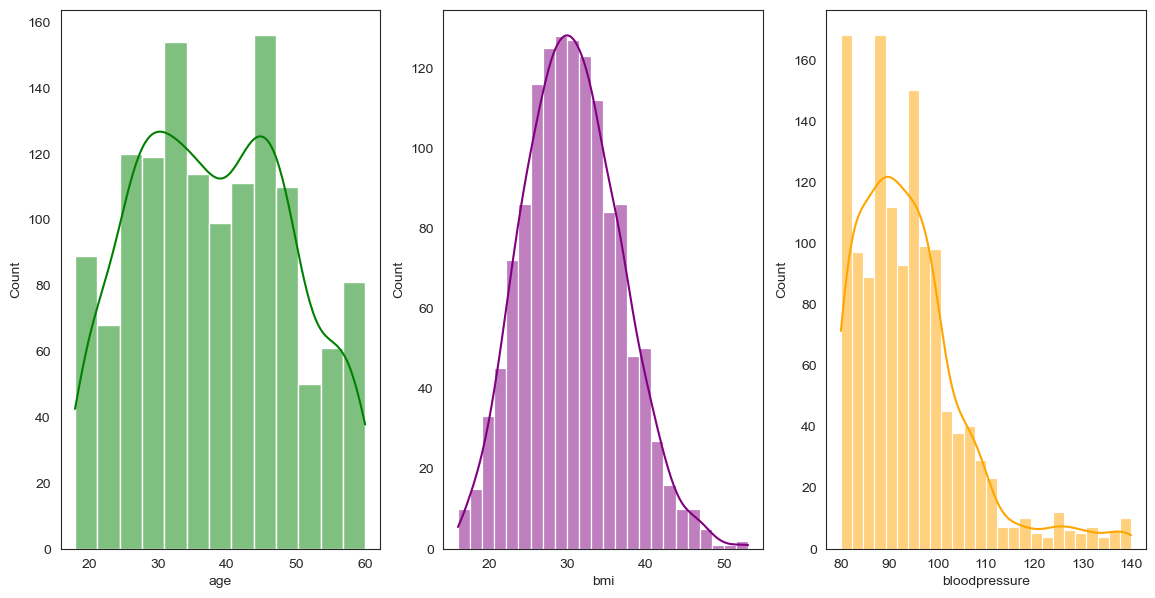

In [15]:
fig,ax = plt.subplots(1,3,figsize=(14,7))
sns.histplot(data=insurance_df,x='age',kde=True,ax=ax[0],color='green')
sns.histplot(data=insurance_df,x='bmi',kde=True,ax=ax[1],color='purple')
sns.histplot(data=insurance_df,x='bloodpressure',kde=True,ax=ax[2],color='orange');

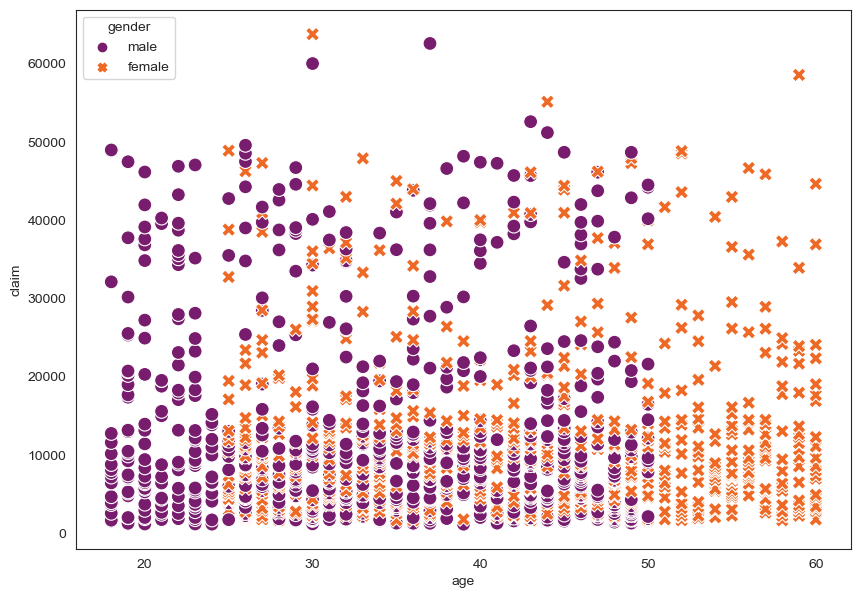

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=insurance_df,x='age',y='claim',hue='gender',style='gender',s=100,palette='inferno');

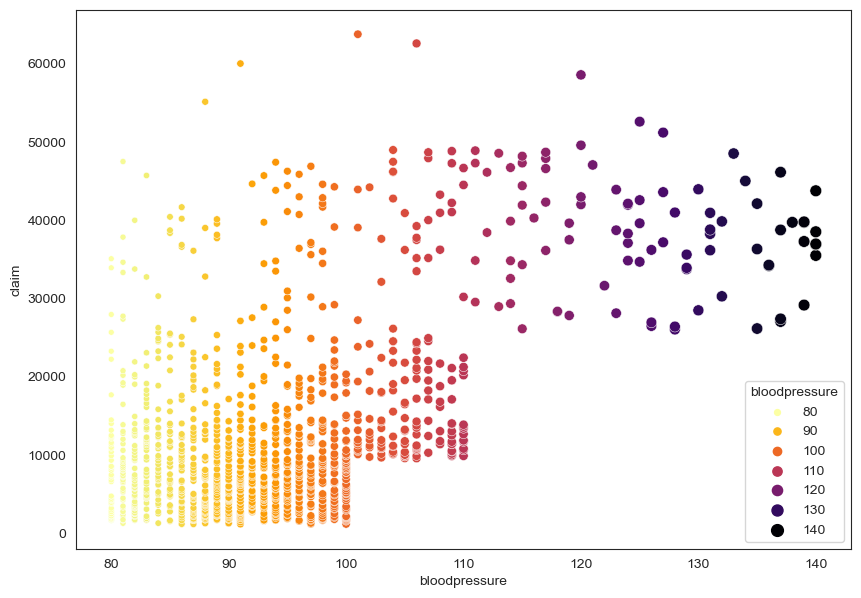

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=insurance_df,x='bloodpressure',y='claim',size='bloodpressure',hue='bloodpressure',palette='inferno_r');

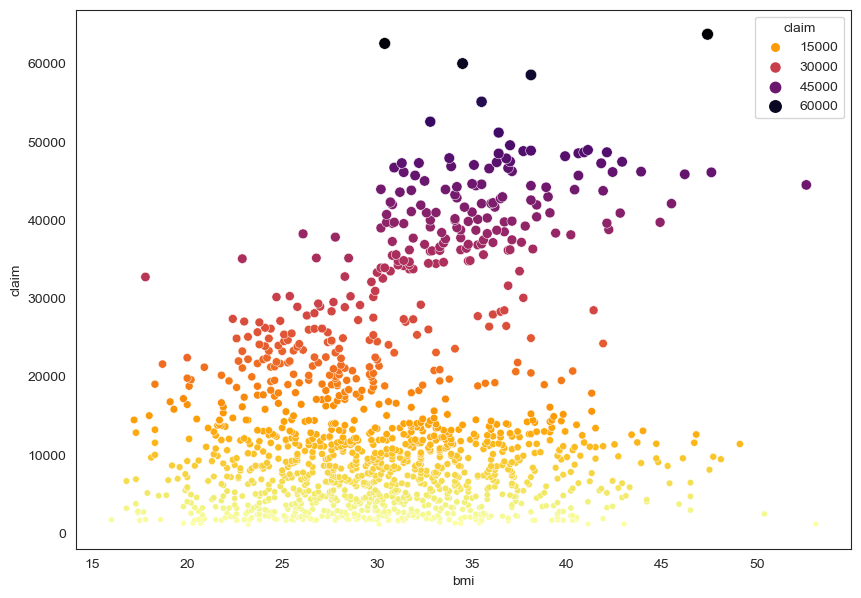

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=insurance_df,x='bmi',y='claim',size='claim',hue='claim',palette='inferno_r');

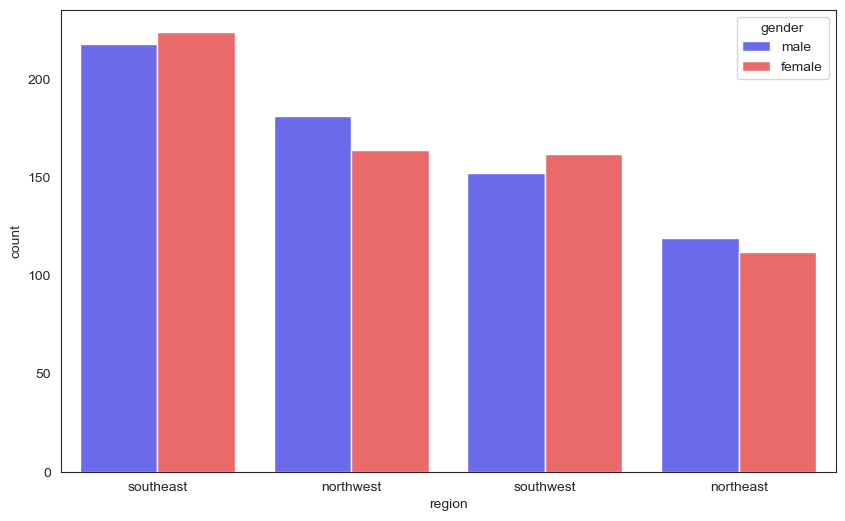

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=insurance_df,x='region',hue='gender',palette='seismic');

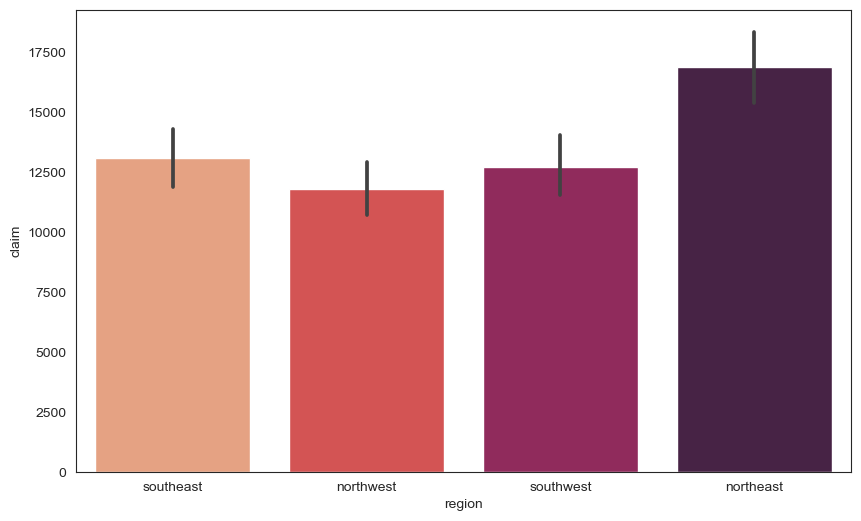

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=insurance_df,x='region',y='claim',palette='rocket_r');

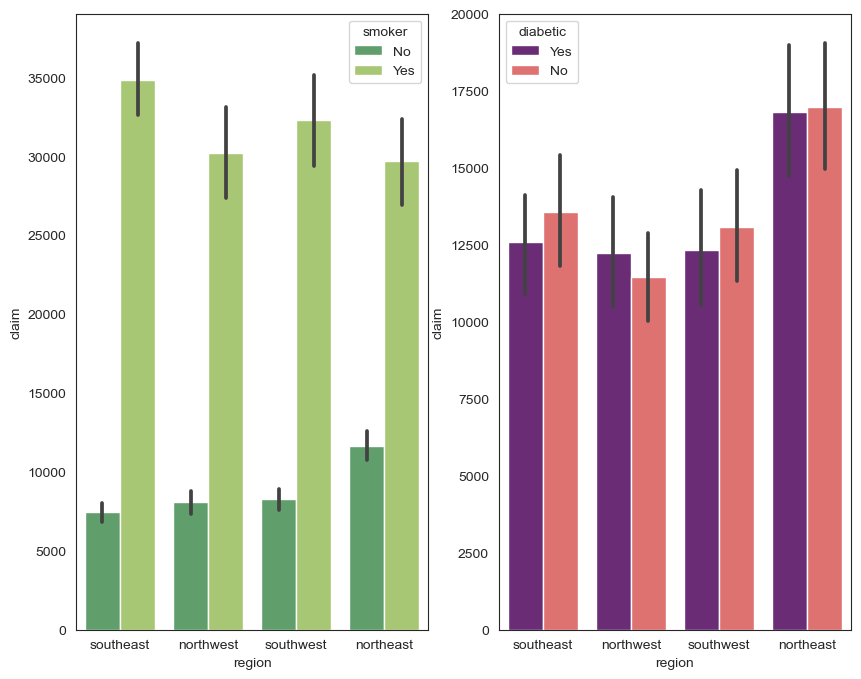

In [22]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
sns.barplot(data=insurance_df,x='region',y='claim',hue='smoker',palette='summer',ax=ax[0])
sns.barplot(data=insurance_df,x='region',y='claim',hue='diabetic',palette='magma',ax=ax[1])
plt.tight_layout;

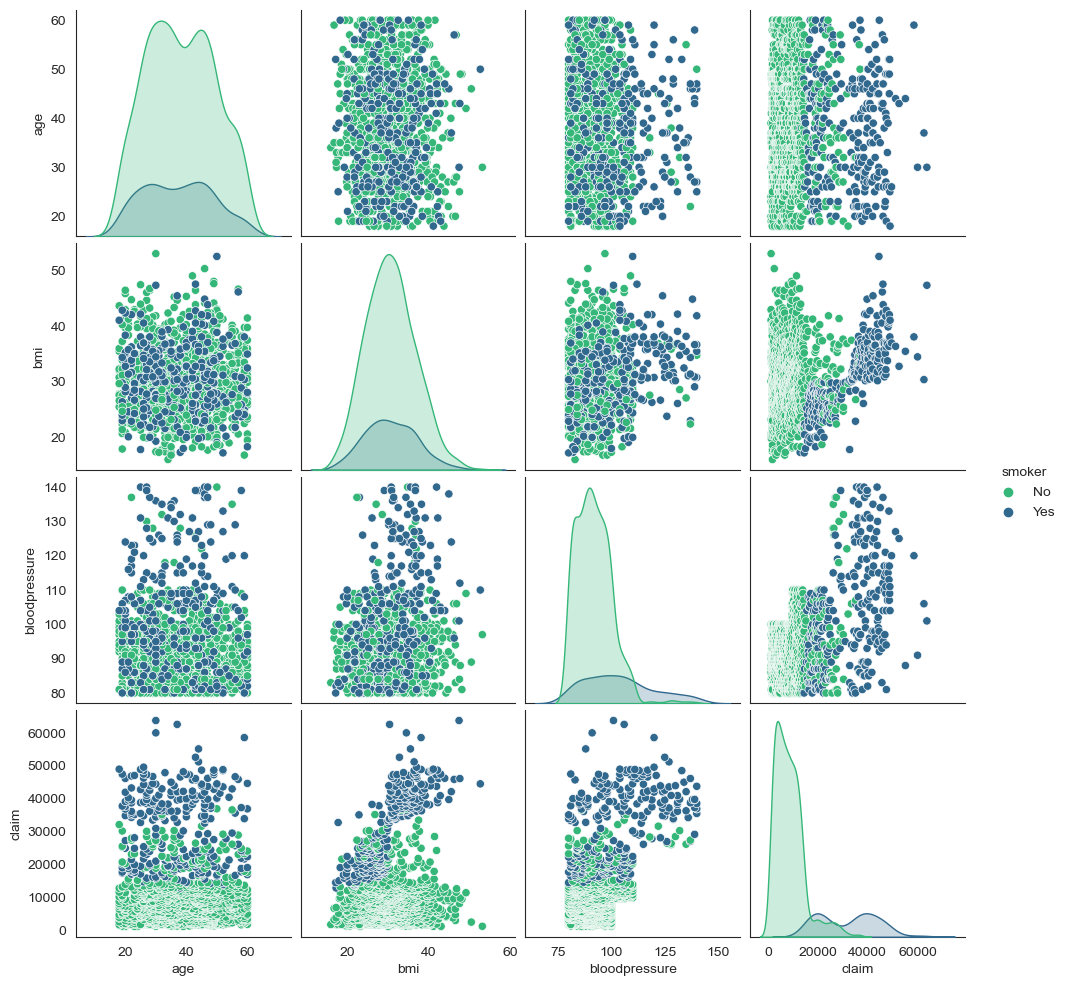

In [23]:
sns.pairplot(insurance_df,hue='smoker',palette='viridis_r');

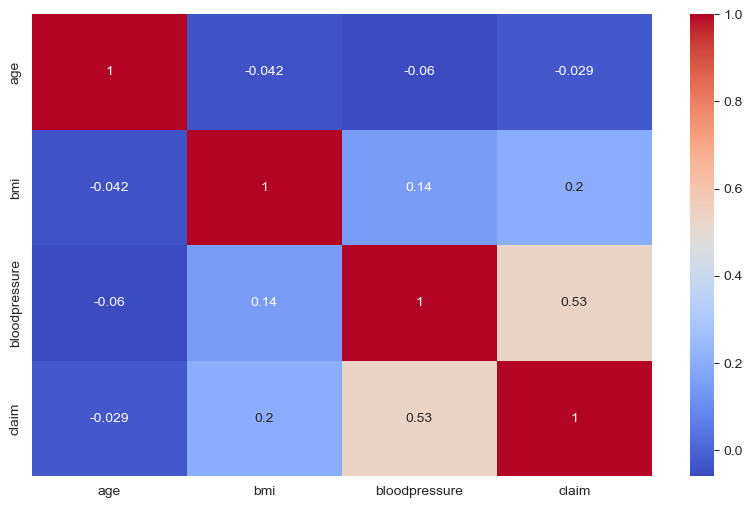

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(insurance_df.corr(),annot=True,cmap='coolwarm');

## `Data Pre-processing`:

* **Outlier detection:**

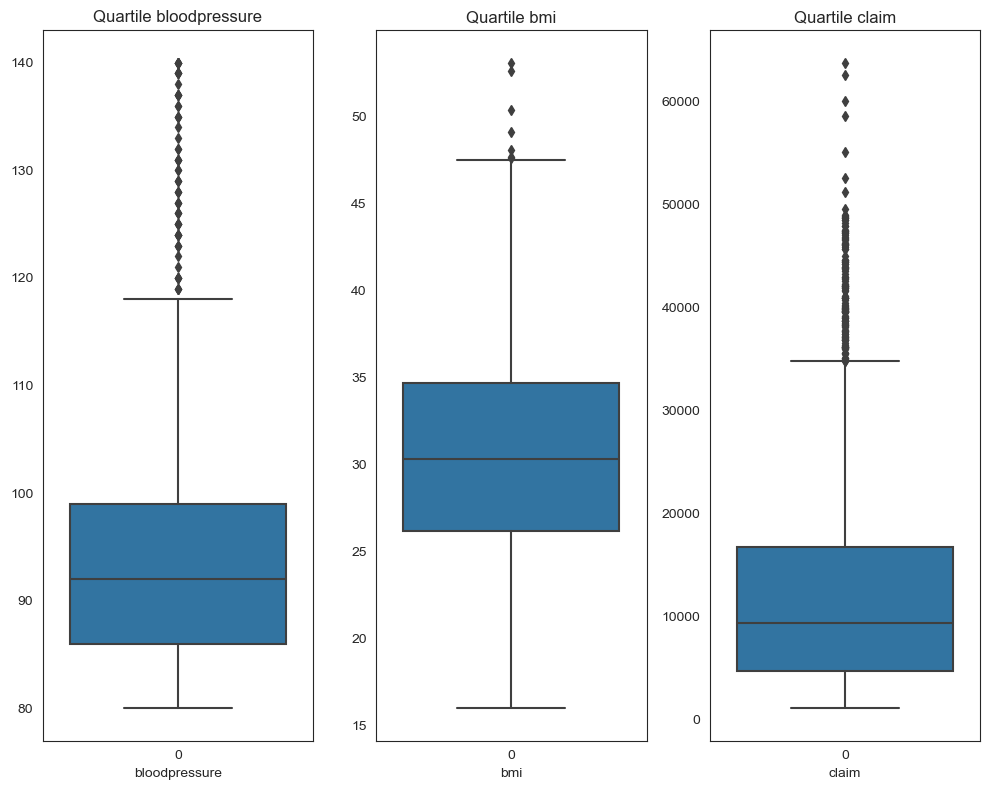

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
sns.boxplot(data=insurance_df['bloodpressure'])
plt.title('Quartile bloodpressure')
plt.xlabel('bloodpressure')
plt.subplot(1,3,2)
sns.boxplot(data=insurance_df['bmi'])
plt.title('Quartile bmi')
plt.xlabel('bmi')
plt.subplot(1,3,3)
sns.boxplot(data=insurance_df['claim'])
plt.title('Quartile claim')
plt.xlabel('claim')
plt.tight_layout()
plt.show()

In [16]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (IQR*1.5)
    upper_range = Q1 + (IQR*1.5)
    return lower_range,upper_range

In [17]:
outlier_treatment(insurance_df['claim'])

(-13271.597499999996, 22791.9125)

In [28]:
#insurance_df[(insurance_df['bloodpressure'] > 105) | (insurance_df['bmi'] > 38)]

In [18]:
outlier = insurance_df[insurance_df['claim'] > 50000]
outlier

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim
1333,44.0,male,36.4,127,No,Yes,southwest,51194.56
1334,43.0,male,32.8,125,No,Yes,southwest,52590.83
1335,44.0,female,35.5,88,Yes,Yes,northwest,55135.40
1336,59.0,female,38.1,120,No,Yes,northeast,58571.07
1337,30.0,male,34.5,91,Yes,Yes,northwest,60021.40
1338,37.0,male,30.4,106,No,Yes,southeast,62592.87
1339,30.0,female,47.4,101,No,Yes,southeast,63770.43


In [19]:
insurance_df = insurance_df.drop(index=outlier.index)
insurance_df

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim
0,39.0,male,23.2,91,Yes,No,southeast,1121.87
1,24.0,male,30.1,87,No,No,southeast,1131.51
7,19.0,male,41.1,100,No,No,northwest,1146.80
8,20.0,male,43.0,86,No,No,northwest,1149.40
9,30.0,male,53.1,97,No,No,northwest,1163.46
...,...,...,...,...,...,...,...,...
1328,45.0,male,42.1,117,No,Yes,southeast,48675.52
1329,52.0,female,37.7,109,Yes,Yes,southwest,48824.45
1330,25.0,female,38.1,111,No,Yes,southeast,48885.14
1331,18.0,male,41.1,104,No,Yes,southeast,48970.25


* **Encoding:**

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
insurance_x = insurance_df.copy()

In [33]:
le = LabelEncoder()
insurance_x['gender'] = le.fit_transform(insurance_x['gender'])
insurance_x['diabetic'] = le.fit_transform(insurance_x['diabetic'])
insurance_x['smoker'] = le.fit_transform(insurance_x['smoker'])
insurance_x['region'] = le.fit_transform(insurance_x['region'])

In [34]:
insurance_x

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim
0,39.0,1,23.2,91,1,0,2,1121.87
1,24.0,1,30.1,87,0,0,2,1131.51
7,19.0,1,41.1,100,0,0,1,1146.80
8,20.0,1,43.0,86,0,0,1,1149.40
9,30.0,1,53.1,97,0,0,1,1163.46
...,...,...,...,...,...,...,...,...
1328,45.0,1,42.1,117,0,1,2,48675.52
1329,52.0,0,37.7,109,1,1,3,48824.45
1330,25.0,0,38.1,111,0,1,2,48885.14
1331,18.0,1,41.1,104,0,1,2,48970.25


In [35]:
X_x = insurance_x.drop('claim',axis=1)

y_x = insurance_x['claim']

In [36]:
X_train_x,X_test_x,y_train_x,y_test_x = train_test_split(X_x,y_x,test_size=0.25,random_state=101)

In [37]:
insurance_y = insurance_df.copy()

In [38]:
insurance_y = pd.get_dummies(insurance_y)
insurance_y

,age,bmi,bloodpressure,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,1121.87,0,1,0,1,1,0,0,0,1,0
1,24.0,30.1,87,1131.51,0,1,1,0,1,0,0,0,1,0
7,19.0,41.1,100,1146.80,0,1,1,0,1,0,0,1,0,0
8,20.0,43.0,86,1149.40,0,1,1,0,1,0,0,1,0,0
9,30.0,53.1,97,1163.46,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,45.0,42.1,117,48675.52,0,1,1,0,0,1,0,0,1,0
1329,52.0,37.7,109,48824.45,1,0,0,1,0,1,0,0,0,1
1330,25.0,38.1,111,48885.14,1,0,1,0,0,1,0,0,1,0
1331,18.0,41.1,104,48970.25,0,1,1,0,0,1,0,0,1,0


In [39]:
X_y = insurance_y.drop('claim',axis=1)

y_y = insurance_y['claim']

In [40]:
X_train_y,X_test_y,y_train_y,y_test_y = train_test_split(X_y,y_y,test_size=0.25,random_state=101)

### `Predictive analysis`:
*`Model selection`*

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
def regrssion_metrics(y_test,y_pred_x,y_pred_y):
    (mae_x,mae_y) = mean_absolute_error(y_test,y_pred_x),mean_absolute_error(y_test,y_pred_y)
    (rmse_x,rmse_y) = np.sqrt(mean_squared_error(y_test,y_pred_x)),np.sqrt(mean_squared_error(y_test,y_pred_y))
    (r2_x,r2_y) = r2_score(y_test,y_pred_x),r2_score(y_test,y_pred_y)
    print(f'mae_x: {mae_x}\t mae_y: {mae_y}\n')
    print(f'rmse_x: {rmse_x}\t rmse_y: {rmse_y}\n')
    print(f'r2_x: {r2_x}\t r2_y: {r2_y}')

In [43]:
linear_model_x = LinearRegression()
linear_model_y = LinearRegression()

linear_model_x.fit(X_train_x,y_train_x)
linear_model_y.fit(X_train_y,y_train_y)

pred_linear_x = linear_model_x.predict(X_test_x)
pred_linear_y = linear_model_y.predict(X_test_y)

In [44]:
regrssion_metrics(y_test_x,pred_linear_x,pred_linear_y)

mae_x: 5068.888044770664	 mae_y: 4970.239630983583

rmse_x: 6679.246801399739	 rmse_y: 6627.374571242898

r2_x: 0.6616580295217007	 r2_y: 0.6668928719261418


In [45]:
rdfr_model_x = RandomForestRegressor()
rdfr_model_y = RandomForestRegressor()

rdfr_model_x.fit(X_train_x,y_train_x)
rdfr_model_y.fit(X_train_y,y_train_y)

pred_rdfr_x = rdfr_model_x.predict(X_test_x)
pred_rdfr_y = rdfr_model_y.predict(X_test_y)

In [46]:
regrssion_metrics(y_test_x,pred_rdfr_x,pred_rdfr_y)

mae_x: 4129.2111623493975	 mae_y: 4133.897200903615

rmse_x: 5562.793225263891	 rmse_y: 5570.294192985059

r2_x: 0.7653142468369974	 r2_y: 0.7646809113723163


In [47]:
adbr_model_x = AdaBoostRegressor()
adbr_model_y = AdaBoostRegressor()

adbr_model_x.fit(X_train_x,y_train_x)
adbr_model_y.fit(X_train_y,y_train_y)

pred_adbr_x = adbr_model_x.predict(X_test_x)
pred_adbr_y = adbr_model_y.predict(X_test_y)

In [48]:
regrssion_metrics(y_test_x,pred_adbr_x,pred_adbr_y)

mae_x: 4548.8932005012975	 mae_y: 4334.271333549811

rmse_x: 5809.134749948867	 rmse_y: 5531.19969529037

r2_x: 0.7440684698991807	 r2_y: 0.7679724424021616


In [49]:
gdbr_model_x = GradientBoostingRegressor()
gdbr_model_y = GradientBoostingRegressor()

gdbr_model_x.fit(X_train_x,y_train_x)
gdbr_model_y.fit(X_train_y,y_train_y)

pred_gdbr_x = gdbr_model_x.predict(X_test_x)
pred_gdbr_y = gdbr_model_y.predict(X_test_y)

In [50]:
regrssion_metrics(y_test_x,pred_gdbr_x,pred_gdbr_y)

mae_x: 3982.6781144758957	 mae_y: 3948.386371532327

rmse_x: 5506.239369414681	 rmse_y: 5454.503785455416

r2_x: 0.7700618321625857	 r2_y: 0.7743624440243564


In [51]:
gdbr1_model_x = GradientBoostingRegressor(learning_rate=0.1,n_estimators=30)
gdbr2_model_y = GradientBoostingRegressor(learning_rate=0.1,n_estimators=30)

gdbr1_model_x.fit(X_train_x,y_train_x)
gdbr2_model_y.fit(X_train_y,y_train_y)

pred_gdbr1_x = gdbr1_model_x.predict(X_test_x)
pred_gdbr2_y = gdbr2_model_y.predict(X_test_y)

In [52]:
regrssion_metrics(y_test_x,pred_gdbr1_x,pred_gdbr2_y)

mae_x: 3943.043993083087	 mae_y: 3938.6737366029924

rmse_x: 5395.204359330722	 rmse_y: 5373.325092138229

r2_x: 0.779241877915284	 r2_y: 0.7810287360108709


In [53]:
knnr_model_x = KNeighborsRegressor(n_neighbors=5)
knnr_model_y = KNeighborsRegressor(n_neighbors=5)

knnr_model_x.fit(X_train_x,y_train_x)
knnr_model_y.fit(X_train_y,y_train_y)

pred_knnr_x = knnr_model_x.predict(X_test_x)
pred_knnr_y = knnr_model_y.predict(X_test_y)

In [54]:
regrssion_metrics(y_test_x,pred_knnr_x,pred_knnr_y)

mae_x: 7124.017415662651	 mae_y: 7050.926421686749

rmse_x: 10001.455050810815	 rmse_y: 9950.233855885284

r2_x: 0.24137479669294326	 r2_y: 0.24912530635999008


In [55]:
xgbr_model_x = xgb.XGBRegressor()
xgbr_model_y = xgb.XGBRegressor()

xgbr_model_x.fit(X_train_x,y_train_x)
xgbr_model_y.fit(X_train_y,y_train_y)

pred_xgbr_x = xgbr_model_x.predict(X_test_x)
pred_xgbr_y = xgbr_model_y.predict(X_test_y)

In [56]:
regrssion_metrics(y_test_x,pred_xgbr_x,pred_xgbr_y)

mae_x: 4630.43298041493	 mae_y: 4580.226865675593

rmse_x: 6196.121123809987	 rmse_y: 6174.299651336914

r2_x: 0.7088339801851169	 r2_y: 0.7108812232889149


# `Saving the model`:

## `Data Encoding :`

In [20]:
insurance_z = insurance_df.copy()
insurance_z.head()

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim
0,39.0,male,23.2,91,Yes,No,southeast,1121.87
1,24.0,male,30.1,87,No,No,southeast,1131.51
7,19.0,male,41.1,100,No,No,northwest,1146.80
8,20.0,male,43.0,86,No,No,northwest,1149.40
9,30.0,male,53.1,97,No,No,northwest,1163.46


In [21]:
for column in insurance_z.select_dtypes(include='object').columns:
    if column == 'gender':
        insurance_z[column] = insurance_z[column].map({'male':1,'female':0})
    elif column == 'diabetic':
        insurance_z[column] = insurance_z[column].map({'Yes':1,'No':0})
    elif column == 'smoker':
        insurance_z[column] = insurance_z[column].map({'Yes':1,'No':0})
    else:
        insurance_z[column] = insurance_z[column].map({'southeast':0, 'northwest':1, 'southwest':2, 'northeast':3})
insurance_z['region'].unique()

array([0, 1, 2, 3], dtype=int64)

In [22]:
insurance_z.head(10)

,age,gender,bmi,bloodpressure,diabetic,smoker,region,claim
0,39.0,1,23.2,91,1,0,0,1121.87
1,24.0,1,30.1,87,0,0,0,1131.51
7,19.0,1,41.1,100,0,0,1,1146.80
8,20.0,1,43.0,86,0,0,1,1149.40
9,30.0,1,53.1,97,0,0,1,1163.46
10,36.0,1,19.8,88,1,0,1,1241.57
11,37.0,1,20.3,90,1,0,1,1242.26
12,19.0,1,20.7,81,0,0,1,1242.82
16,35.0,1,34.1,90,0,0,2,1261.44
17,41.0,1,34.4,84,0,0,2,1261.86


## `Scaling data`:

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
X = insurance_z.drop('claim',axis=1)
y = insurance_z['claim']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

**`MinmaxScaler:`**

In [35]:
min_max = MinMaxScaler()
min_x_train = min_max.fit_transform(X_train)
min_x_test = min_max.transform(X_test)

**`StandardScaler:`**

In [42]:
scaler = StandardScaler()
scaler_x_train = scaler.fit_transform(X_train)
scaler_x_test = scaler.transform(X_test)

***`Gradient Boosting model training with scaled data:`***

In [48]:
gradient_model1 = GradientBoostingRegressor()
gradient_model2 = GradientBoostingRegressor()

gradient_model1.fit(min_x_train,y_train)
gradient_model2.fit(scaler_x_train,y_train)

prediction_1 = gradient_model1.predict(min_x_test)
prediction_2 = gradient_model2.predict(scaler_x_test)

In [49]:
regrssion_metrics(y_test,prediction_1,prediction_2)

mae_x: 4012.749820571478	 mae_y: 4014.6575276736944

rmse_x: 5586.240053579909	 rmse_y: 5590.758766036946

r2_x: 0.7948050510308313	 r2_y: 0.7944729521678127


In [50]:
gradient_model3 = GradientBoostingRegressor(learning_rate=0.1,n_estimators=30)
gradient_model4 = GradientBoostingRegressor(learning_rate=0.1,n_estimators=30)

gradient_model3.fit(min_x_train,y_train)
gradient_model4.fit(scaler_x_train,y_train)

prediction_3 = gradient_model3.predict(min_x_test)
prediction_4 = gradient_model4.predict(scaler_x_test)

In [51]:
regrssion_metrics(y_test,prediction_3,prediction_4)

mae_x: 3897.931445420241	 mae_y: 3891.707079617074

rmse_x: 5506.581089197837	 rmse_y: 5502.374759403625

r2_x: 0.8006154257814359	 r2_y: 0.800919918511102


***`Gradient Boosting model training with non-scaled data:`***

In [46]:
gradient_model = GradientBoostingRegressor()

gradient_model.fit(X_train,y_train)

prediction = gradient_model1.predict(X_test)

In [47]:
regrssion_metrics(y_test,prediction,prediction_1)

mae_x: 20916.32355644404	 mae_y: 4019.3248579617652

rmse_x: 22577.70635124013	 rmse_y: 5592.293678596735

r2_x: -2.351869624191364	 r2_y: 0.7943600839990916


**`Saving scaler:`**

In [26]:
min_scaler = MinMaxScaler()

In [27]:
min_scaler.fit(X_train)

MinMaxScaler()

In [28]:
x_min_test = min_scaler.transform(X_test)
x_min_test

array([[0.23809524, 0.        , 0.08815427, ..., 1.        , 1.        ,
        1.        ],
       [0.66666667, 1.        , 0.41597796, ..., 1.        , 1.        ,
        0.33333333],
       [0.85714286, 0.        , 0.42424242, ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.5       , 1.        , 0.52892562, ..., 1.        , 1.        ,
        0.        ],
       [0.23809524, 1.        , 0.19834711, ..., 1.        , 0.        ,
        1.        ],
       [0.69047619, 1.        , 0.4738292 , ..., 0.        , 0.        ,
        0.33333333]])

In [29]:
min_scaler.transform([[54.0,0,29.9,90,0,0,1]])

array([[0.85714286, 0.        , 0.36088154, 0.16666667, 0.        ,
        0.        , 0.33333333]])

In [30]:
import joblib

In [31]:
joblib.dump(min_scaler,'model_scaler.pkl')

['model_scaler.pkl']

In [32]:
min_scaler = joblib.load('model_scaler.pkl')

In [33]:
min_scaler.transform([[54.0,0,29.9,90,0,0,1]])

array([[0.85714286, 0.        , 0.36088154, 0.16666667, 0.        ,
        0.        , 0.33333333]])

## `Saving the model`:

In [52]:
import joblib

In [53]:
joblib.dump(gradient_model3,'gradient_model.pkl')

['gradient_model.pkl']

`From the above testing of multiple regerssion algorithms Gradient Boosting performs well and it can be improved further by cross validation.`

In [54]:
model_1 = joblib.load('gradient_model.pkl')

In [55]:
model_1.predict([[0.119048,1.0,0.226776,0.283333,0.0,1.0,1.000000]])

array([21015.90695351])